<a href="https://colab.research.google.com/github/mollah2022/Neural-Network/blob/main/Fraud_Detection(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve


In [7]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")
X = df.drop("Class", axis=1)
y = df["Class"]

In [8]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [10]:
# Apply SMOTE to train set only
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [11]:
# Build XGBoost Model
model = xgb.XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight=10,  # Useful for imbalanced dataset
    random_state=42
)

In [12]:
# Train model
model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [13]:
# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [14]:
# Evaluation Metrics
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_score = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [15]:
# Print all metrics
print("🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Classification Report:\n", class_report)
print("🔹 ROC AUC Score:", roc_score)
print("🔹 Accuracy:", accuracy)
print("🔹 Precision:", precision)
print("🔹 Recall:", recall)
print("🔹 F1 Score:", f1)

🔹 Confusion Matrix:
 [[85248    59]
 [   17   119]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.67      0.88      0.76       136

    accuracy                           1.00     85443
   macro avg       0.83      0.94      0.88     85443
weighted avg       1.00      1.00      1.00     85443

🔹 ROC AUC Score: 0.9920829198900304
🔹 Accuracy: 0.9991105181231933
🔹 Precision: 0.6685393258426966
🔹 Recall: 0.875
🔹 F1 Score: 0.7579617834394905


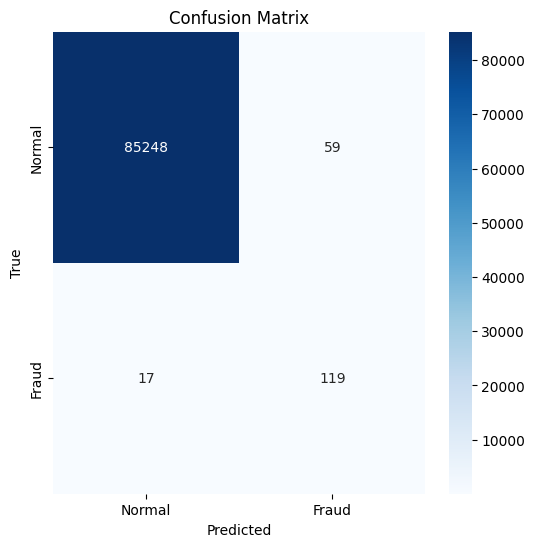

In [16]:

# Visualize Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

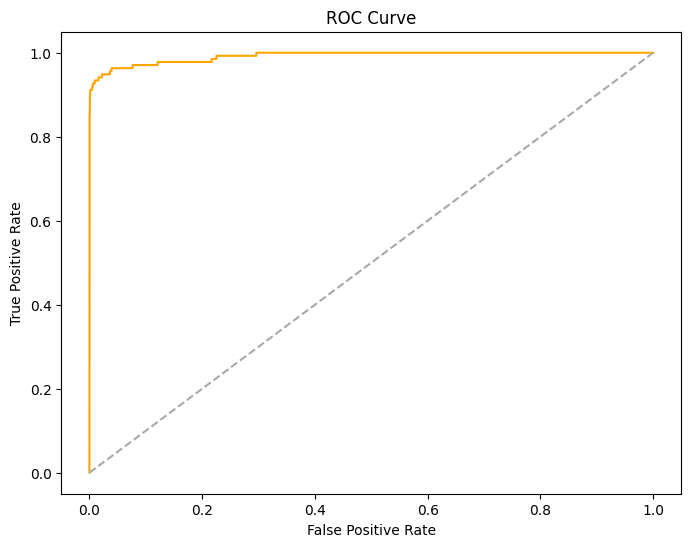

In [17]:
# ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='orange')
plt.plot([0, 1], [0, 1], color='darkgray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()